반복적으로 자주 판매되는 상품의 추이 살펴보기

시간대와 평균매출액간 상관관계를 봤을 때 프라임 시간대가 존재하는지 살펴보기 → 존재한다. 프라임 시간대 변수 넣기
예를 들어 식품은 저녁 시간대에, 건강 대분류는 장년층 타깃인 아침 시간대 매출이 높았다

상품 대분류별로 특징 정리하기
이를 통해 최적의 요일, 시간, 상품 조합이 있는지를 알아내기 위해 연관성 분석을 실행했다.
조건부 확률을 통해 신뢰도를 구하고 요일/시간/상품 조합이 얼마나 빈번한지 파악했는데

의류 상품의 경우 방송 초반에 일찌감치 판매량이 쌓이지만, 대형 가전제품의 경우 방송 중후반부터 판매량이 대폭 치솟는다.

지상파 시청률과 우리가 가지고 있는 시청률 데이터 그래프 그려보기

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/base_line.xlsx', header=0)
else:
    print('Not running on CoLab')
    df = pd.read_excel('c:/bc/base_line.xlsx', header=0, sheet_name='original_data')

Not running on CoLab


# 프라임 시간대

In [4]:
df['168'] = (df['DAY_NUM']-1)*24 + df['HOUR'] 

Text(0.5, 1.0, '요일별 시간대별 취급액(평균)')

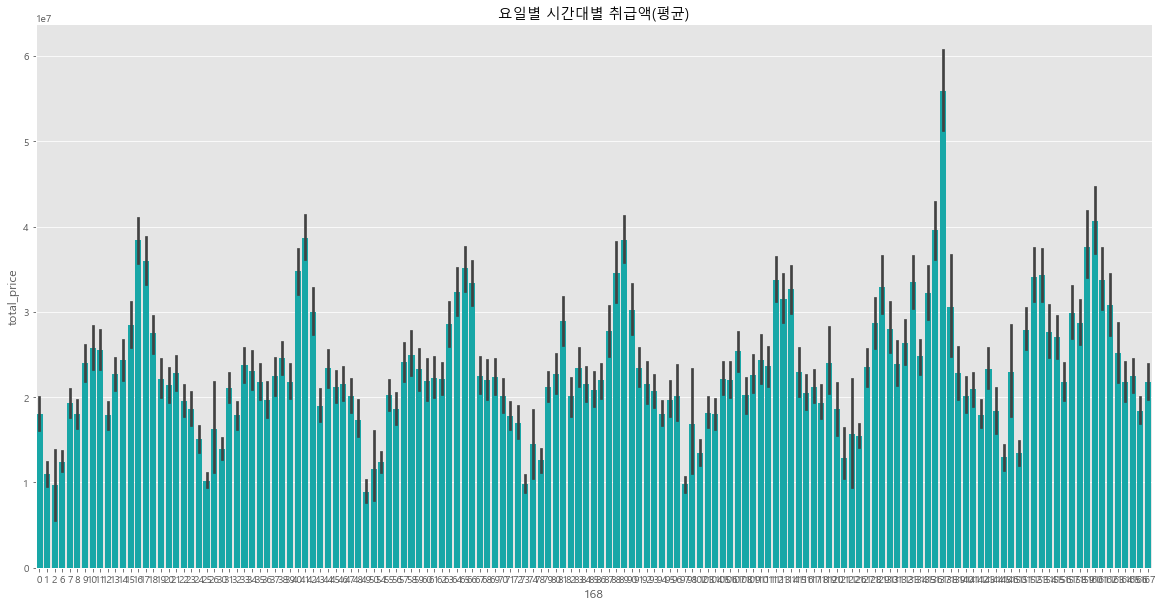

In [5]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=df['168'], y=df['total_price'], data=df, color = "c")
plt.title("요일별 시간대별 취급액(평균)")

Text(0.5, 1.0, '요일별 시간대별 판매량(평균)')

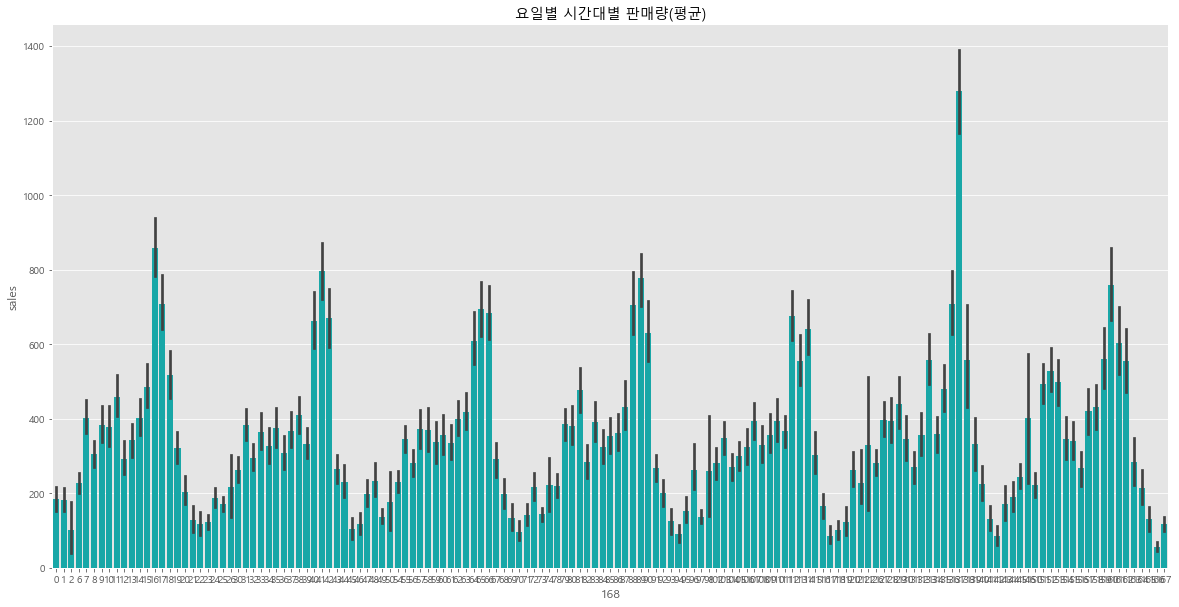

In [6]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=df['168'], y=df['sales'], data=df, color = "c")
plt.title("요일별 시간대별 판매량(평균)")

In [7]:
prime = df.groupby('168').sum()
prime

,exp_min,m_code,p_code,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,DAY_NUM,code,no
168,,,,,,,,,,,,,,,
0,2900.200000,25493708,51105114,91746700,4573589000,46599,512826,1709,3668,0,4830,0,254,910719,5000171
1,2681.733333,20887060,41884093,26501600,2297462000,37638,419952,1294,3161,208,4250,0,208,688286,3769031
2,80.000000,702923,1409087,1087900,67676000,716,14133,77,105,14,0,0,7,42432,235320
6,2910.100000,18072802,36223513,21391000,2239669000,40928,363420,1247,2686,1080,4020,0,180,668833,3676520
7,3000.000000,18489100,37071257,10628500,3548231000,74156,371496,1214,2850,1288,3660,0,184,650169,3568944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1760.000000,17586953,35265055,66193600,4399381000,49506,353325,912,2480,3325,4160,0,1225,476321,2586008
164,2710.000000,29218921,58571663,160595700,6331955000,62217,587529,1779,4734,5820,6850,0,2037,955010,5227620
165,2880.000000,40106164,80337517,439764800,9016756000,52324,807600,2606,5987,8400,8910,0,2800,1395836,7665786


Text(0.5, 1.0, '요일별 시간대별 취급액(합계)')

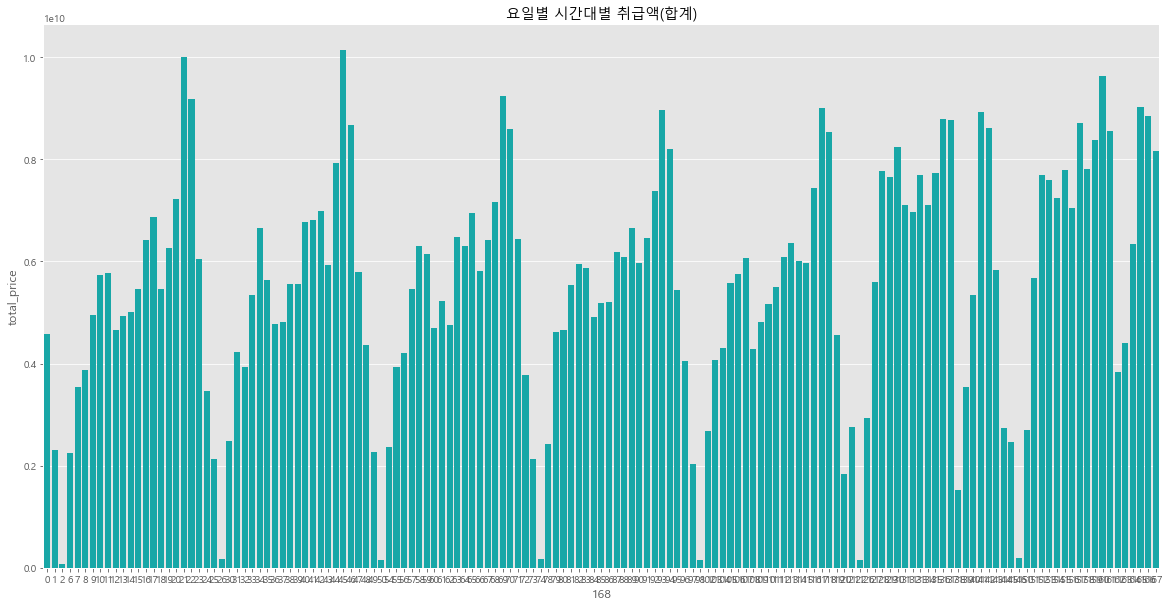

In [11]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=prime.index, y=prime['total_price'], data=prime, color = "c")
plt.title("요일별 시간대별 취급액(합계)")

Text(0.5, 1.0, '요일별 시간대별 판매량(합계)')

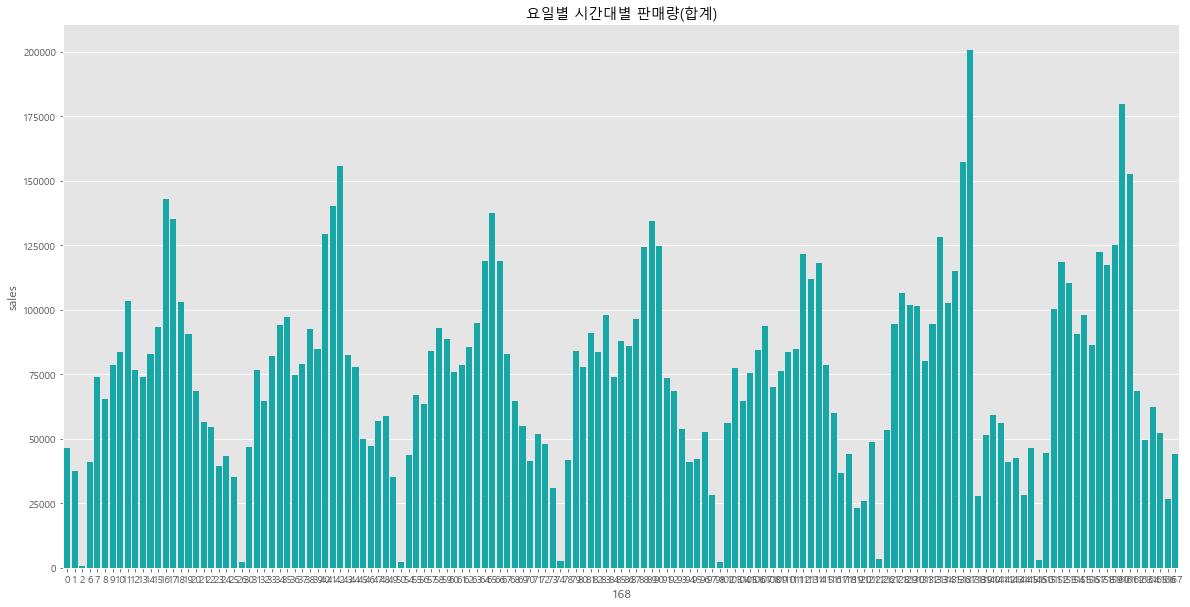

In [12]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=prime.index, y=prime['sales'], data=prime, color = "c")
plt.title("요일별 시간대별 판매량(합계)")

In [10]:
# 밤에는 주로 단가가 높은 상품을 편성한다.(잡화, 가구, 가전)

In [14]:
data = df

In [15]:
건강기능 =data[data['p_group'] == '건강기능']
생활용품 =data[data['p_group'] == '생활용품']
침구 =data[data['p_group'] == '침구']
주방 =data[data['p_group'] == '주방']
가전 =data[data['p_group'] == '가전']
가구 =data[data['p_group'] == '가구']
이미용 =data[data['p_group'] == '이미용']
농수축 =data[data['p_group'] == '농수축']
잡화 =data[data['p_group'] == '잡화']
속옷= data[data['p_group'] == '속옷']
의류=data[data['p_group'] == '의류']

In [16]:
# 카테고리별

# 의류

In [28]:
의류_prime = 의류.groupby('168').sum()
의류_prime

,exp_min,m_code,p_code,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,DAY_NUM,code,no
168,,,,,,,,,,,,,,,
0,640.00,5117012,10264756,4611300,842431000,12312,102969,235,719,0,900,0,51,120014,647464
1,450.55,3306950,6631218,3304700,337810000,5081,66627,185,341,33,570,0,33,94512,516689
6,880.00,5220800,10463076,2861600,737834000,16086,104988,401,928,312,1200,0,52,219750,1212586
7,1000.00,5425605,10878467,2533600,1111153000,27599,109026,355,716,378,1020,0,54,187783,1028090
8,740.00,4619612,9260405,3135700,805090000,13352,92874,205,547,368,930,0,46,102320,549566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,220.00,1406647,2819916,823200,408880000,7474,28266,61,243,266,220,0,98,31919,173812
164,390.00,2912195,5838586,14840500,891837000,10651,58551,256,408,580,660,0,203,139429,769889
165,100.00,803568,1611153,563800,300135000,5211,16152,55,167,168,120,0,56,30352,165790


Text(0.5, 1.0, '의류 요일별 시간대별 취급액(합계)')

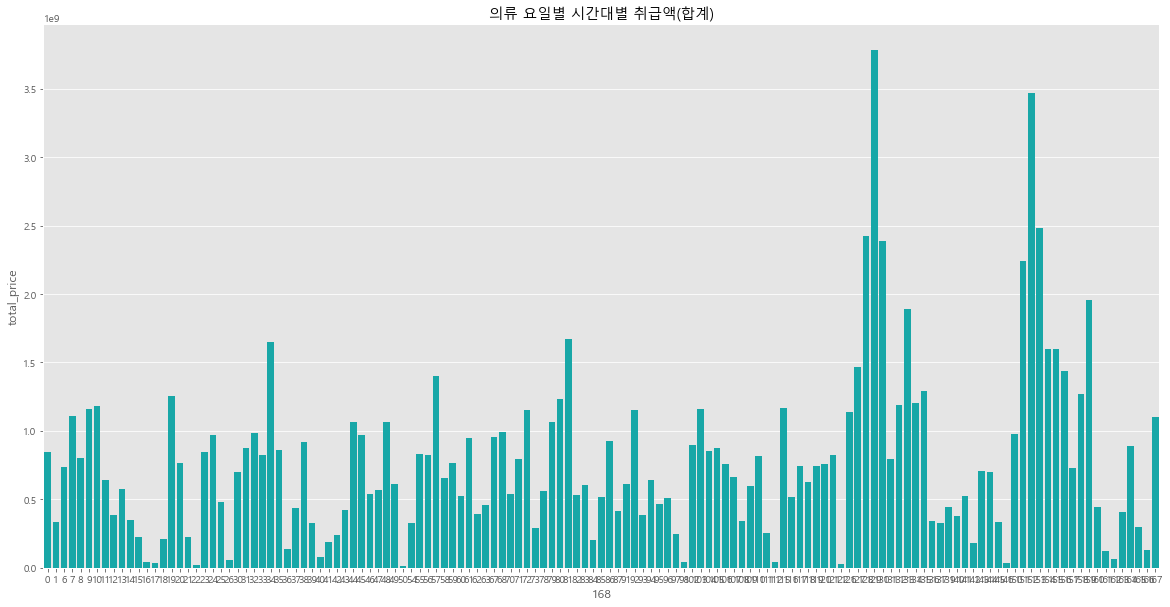

In [29]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=의류_prime.index, y=의류_prime['total_price'], data=의류_prime, color = "c")
plt.title("의류 요일별 시간대별 취급액(합계)")

Text(0.5, 1.0, '의류 요일별 시간대별 취급액(평균)')

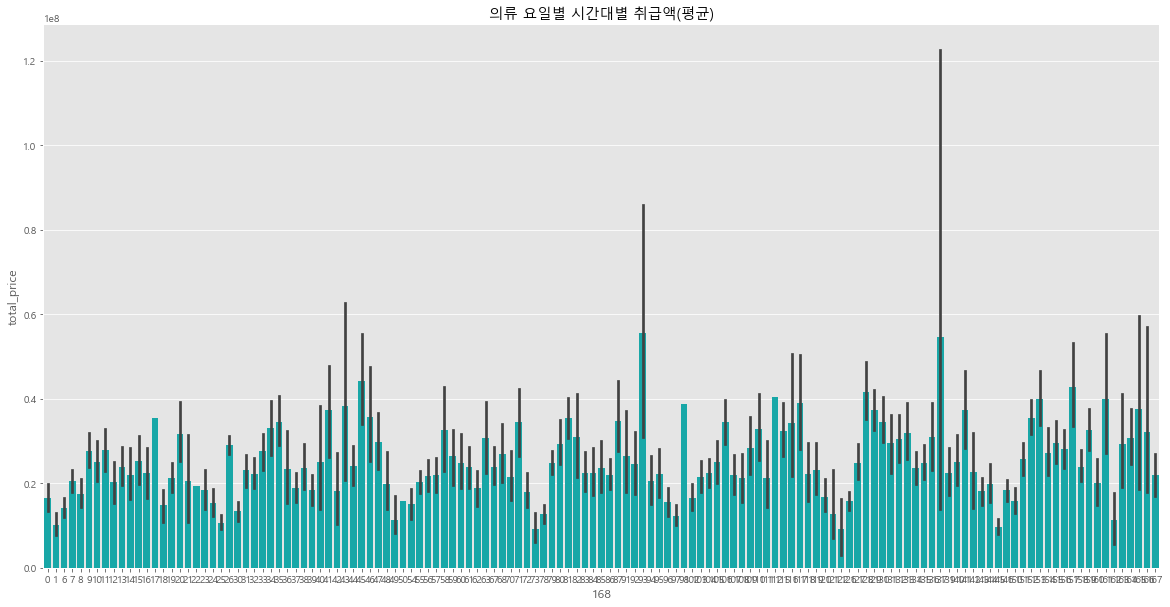

In [30]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=의류['168'], y=의류['total_price'], data=의류, color = "c")
plt.title("의류 요일별 시간대별 취급액(평균)")

# 농추숙

In [24]:
농수축_prime = 농수축.groupby('168').sum()
농수축_prime

,exp_min,m_code,p_code,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,DAY_NUM,code,no
168,,,,,,,,,,,,,,,
0,40.000000,201682,404968,65800,116731000,3549,4038,24,46,0,60,0,2,13524,74943
1,219.416667,1208763,2426892,461800,224964000,5991,24228,55,111,12,300,0,12,26879,145168
7,40.000000,201174,403610,119800,31772000,530,4038,22,22,14,60,0,2,11980,66497
8,20.000000,100587,201805,59900,33990000,567,2019,11,11,8,0,0,1,5990,33250
9,40.000000,201274,403910,59800,79699000,2665,4038,24,18,18,60,0,2,13018,72121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1935.983333,10434721,20912186,4921600,5609014000,125513,209976,729,1628,1768,2070,0,728,394035,2170371
162,1260.016667,6738065,13513665,3444300,2915541000,59081,135273,395,1023,1206,870,0,469,210391,1149518
163,180.000000,903912,1812010,460100,464379000,10014,18171,71,109,171,180,0,63,38185,210782


Text(0.5, 1.0, '농추숙 요일별 시간대별 취급액(합계)')

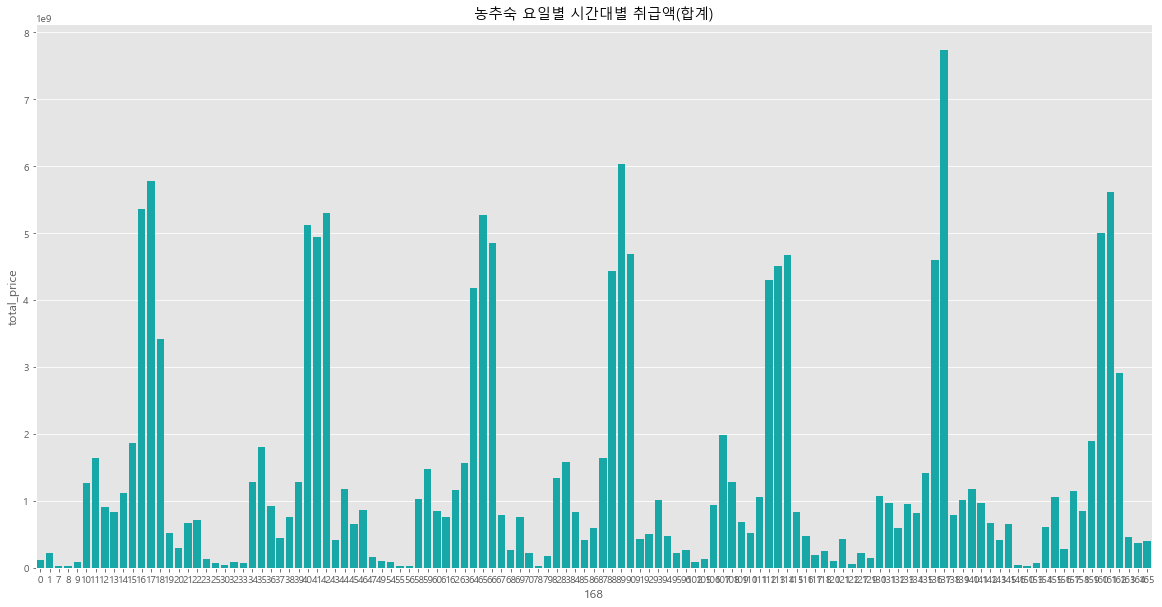

In [26]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=농수축_prime.index, y=농수축_prime['total_price'], data=농수축_prime, color = "c")
plt.title("농추숙 요일별 시간대별 취급액(합계)")

Text(0.5, 1.0, '농추숙 요일별 시간대별 취급액(평균)')

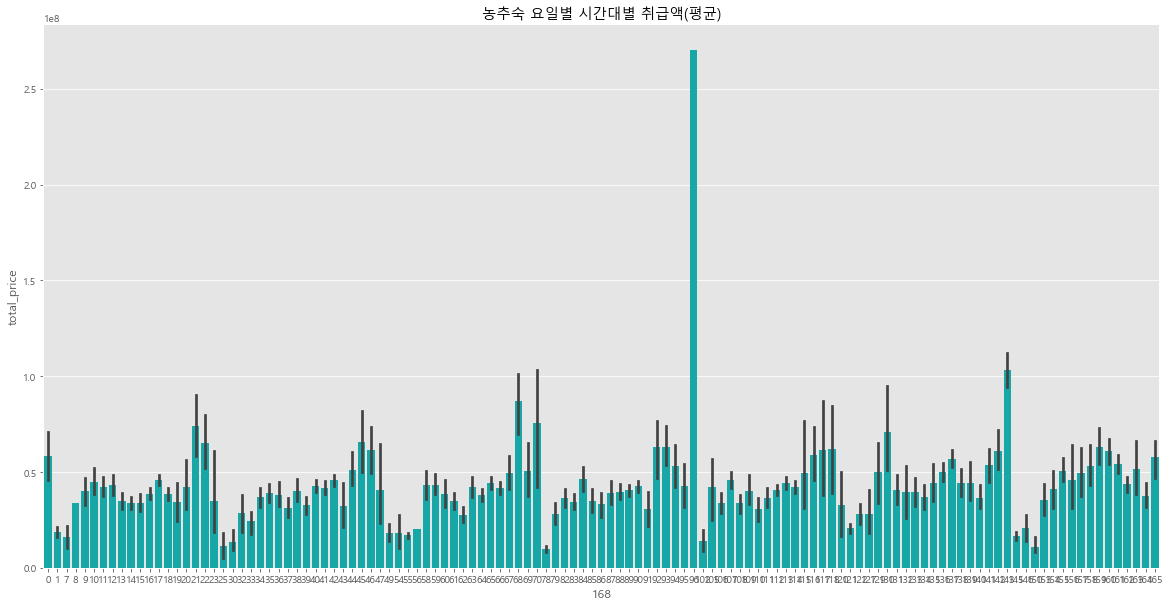

In [27]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=농수축['168'], y=농수축['total_price'], data=농수축, color = "c")
plt.title("농추숙 요일별 시간대별 취급액(평균)")

# 주방

Text(0.5, 1.0, '주방 요일별 시간대별 취급액(평균)')

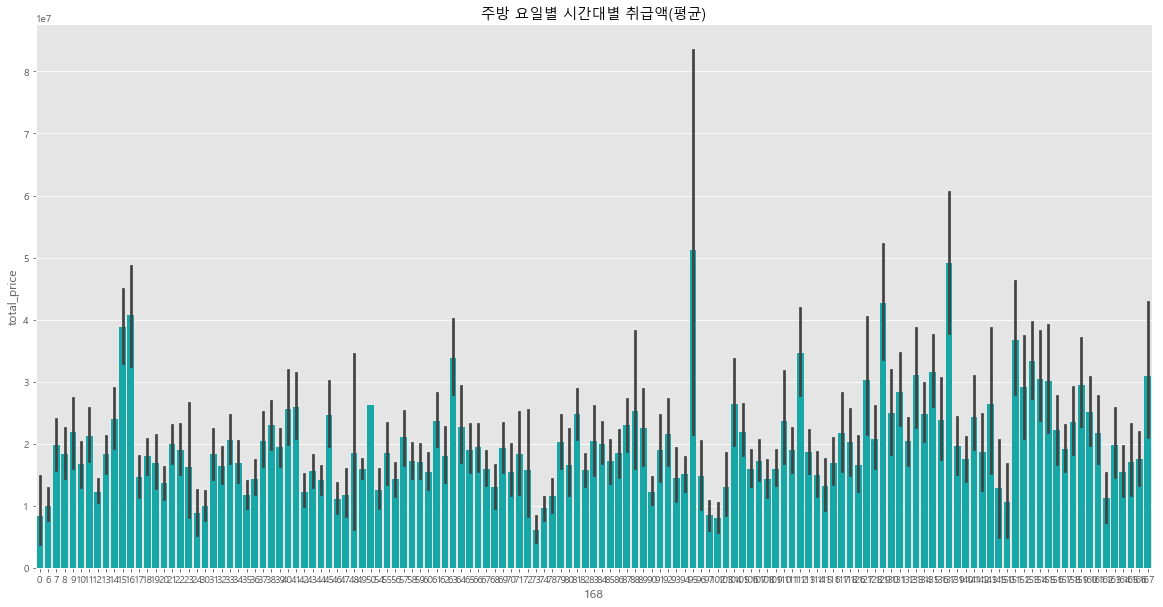

In [31]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=주방['168'], y=주방['total_price'], data=주방, color = "c")
plt.title("주방 요일별 시간대별 취급액(평균)")

# 속옷

Text(0.5, 1.0, '속옷 요일별 시간대별 취급액(평균)')

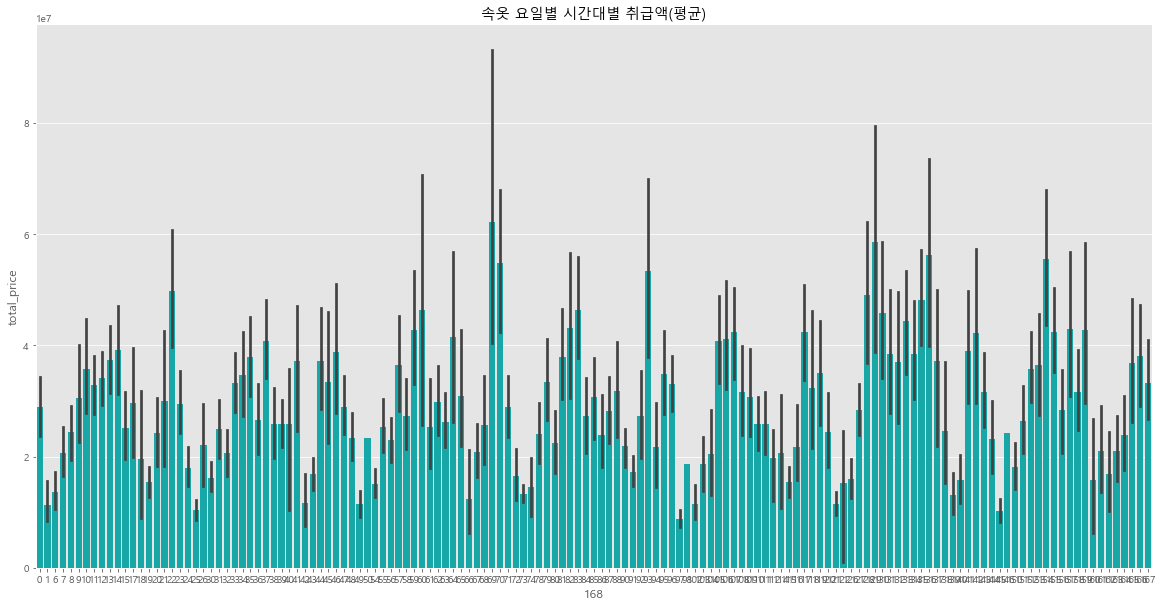

In [32]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=속옷['168'], y=속옷['total_price'], data=속옷, color = "c")
plt.title("속옷 요일별 시간대별 취급액(평균)")

# 가전

Text(0.5, 1.0, '가전 요일별 시간대별 취급액(평균)')

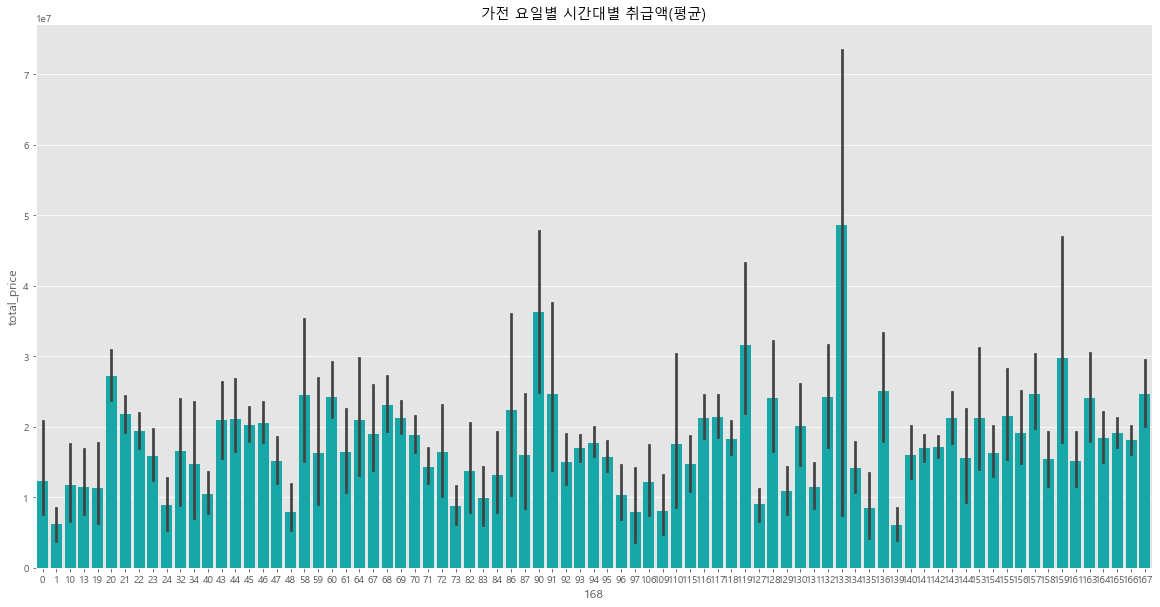

In [33]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=가전['168'], y=가전['total_price'], data=가전, color = "c")
plt.title("가전 요일별 시간대별 취급액(평균)")